In [2]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from ggplot import *


### Custom
import nltk

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [3]:
df = pd.read_csv('../data/train_sample.csv')
# df = pd.read_csv('../data/train.csv')

In [9]:
df['attributes'].apply(lambda x: eval(x)[0])

0                           (ENERGY STAR Certified, No)
1                            (Brand compatibility, Yes)
2     (Bullet01, Blends classic style and single con...
3                       (Kitchen Faucet Type, Pull Out)
4                                   (Weight (lb.), .77)
5     (Bullet06, Water absorption is more than 3% bu...
6                         (Product Weight (lb.), 10.23)
7                           (Product Width (in.), 6.88)
8                                (Number in Package, 1)
9                                 (Color Family, Beige)
10                            (Shutter Size, 14-1/2x60)
11                               (Rug Shape, Rectangle)
12    (Bullet07, Double-bore lock box fits most 2-3/...
13    (Bullet02, Power to drive nails up to 3-1/2 in...
14                                        (Use, Corner)
15    (Bullet06, Drawers fully extend on easy-slide ...
16    (Bullet04, Pre-assembled, 5 ft. 11 in. high x ...
17                         (Product Height (in.)

# Feature explore

In [4]:
### Util Functions
def tokenize_string(string):
    string = str(string)
    return string.lower()

### Feature functions
def match_search_term_to_title(row):
    """
    Is the search term in the product title?
    """
    searh_term = tokenize_string(row['search_term'])
    prod_title = tokenize_string(row['product_title'])
    
    return prod_title.find(searh_term) != - 1

def match_search_term_to_description(row):
    """
    Is the search term in the product desc?
    """
    searh_term = tokenize_string(row['search_term'])
    prod_desc = tokenize_string(row['product_description'])
    
    return prod_desc.find(searh_term) != - 1

def count_description(row):
    """
    Length of description
    """
    return len(tokenize_string(row['product_description']).split(' '))

def count_description(row):
    """
    Length of description
    """
    return len(tokenize_string(row['product_description']).split(' '))

def count_search_description_occurences(row):
    """
    Sum of times search term appears in the description
    """
    search_term = tokenize_string(row['search_term'])
    prod_desc = tokenize_string(row['product_description'])
    sums = 0
    for t in search_term.split(' '):
        sums += prod_desc.count(t)
    return sums

def match_search_description_occurences(row):
    """
    Number of times search term matches in the description (boolean count)
    """
    search_term = tokenize_string(row['search_term'])
    prod_desc = tokenize_string(row['product_description'])
    sums = 0
    for t in search_term.split(' '):
        sums += search_term.find(t) != -1
    return sums

In [5]:
df_feats = pd.DataFrame()
df_feats['match_search'] = df.apply(match_search_term_to_title,axis=1)
df_feats['match_desc'] = df.apply(match_search_term_to_description,axis=1)
df_feats['desc_count'] = df.apply(count_description,axis=1)
df_feats['search_desc_count'] = df.apply(count_search_description_occurences,axis=1)
df_feats['search_desc_match'] = df.apply(match_search_description_occurences,axis=1)
df_feats['relevance'] = df['relevance']

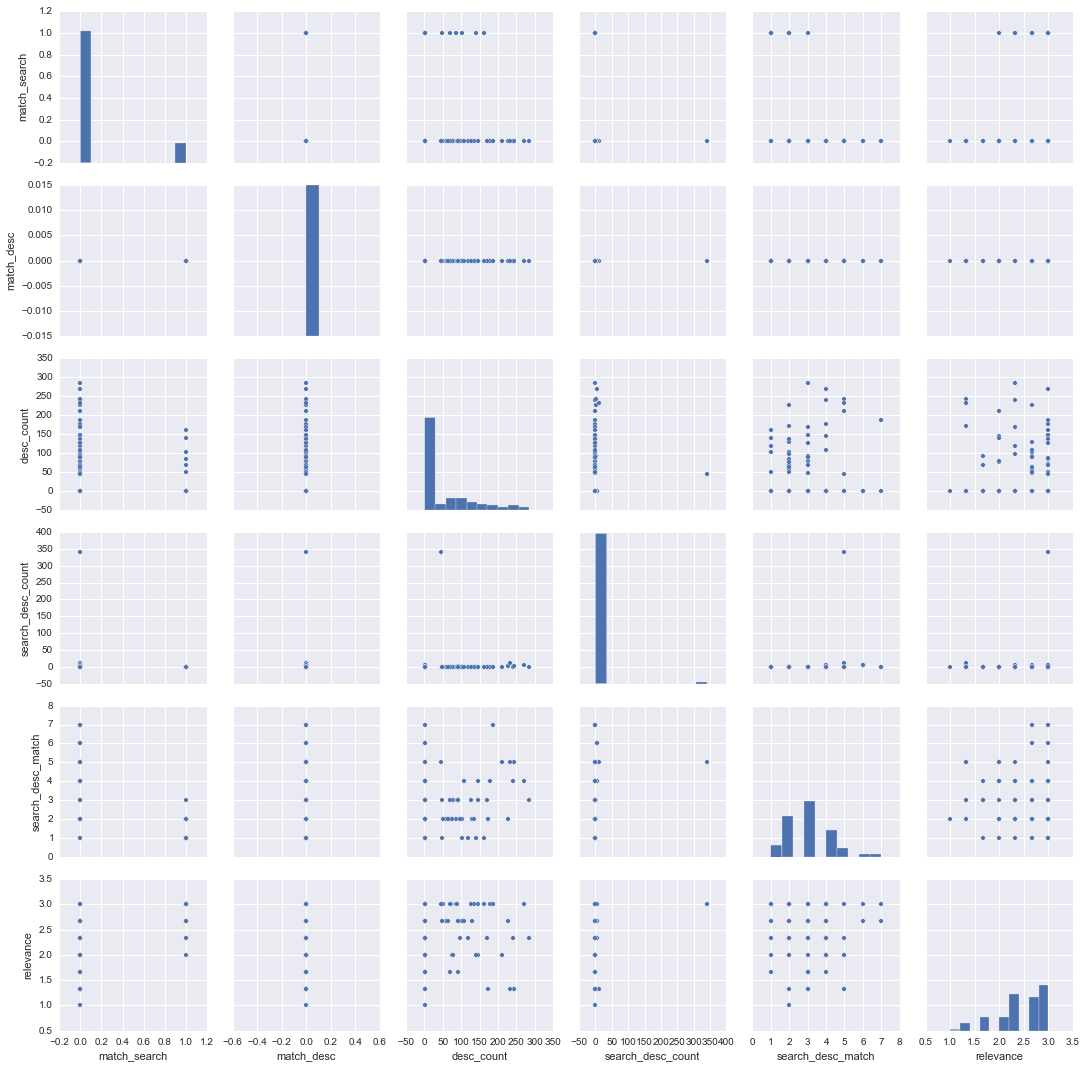

In [6]:
sns.pairplot(df_feats)